### 决策边界可视化

[[3. 5.]
 [1. 3.]]
[[-0.5 -0.5]]
[3.]


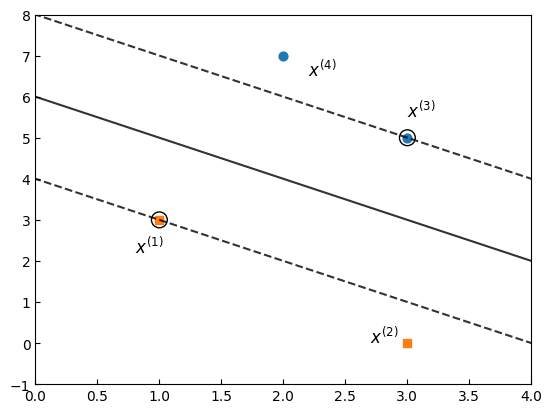

<1,1> =<[1 3],[1 3]> = 10
<1,2> =<[1 3],[3 0]> = 6
<1,3> =<[1 3],[3 5]> = 36
<1,4> =<[1 3],[2 7]> = 46
<2,2> =<[3 0],[3 0]> = 9
<2,3> =<[3 0],[3 5]> = 18
<2,4> =<[3 0],[2 7]> = 12
<3,3> =<[3 5],[3 5]> = 34
<3,4> =<[3 5],[2 7]> = 82
<4,4> =<[2 7],[2 7]> = 53


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


def decision_boundary():
    # 构造数据

    # X = np.array([[0, 3], [3, 0.5], [3., 5], [2, 2], [1, 3], [5, 4], [2, 6.5]])
    X = np.array([[1, 3], [-0.1, 3.9], [4.1, -0.2], [3, 0], [3, 5], [2, 7], [-0.1, 9]])
    y = np.array([1, 1, 1, 1, 0, 0, 0])
    # X = np.array([[1, 3], [3,0], [3, 5], [2, 7]])
    # y = np.array([1, 1, 0, 0])
    plt.rcParams['ytick.direction'] = 'in'  # 刻度向内
    plt.rcParams['xtick.direction'] = 'in'  # 刻度向内
    plt.annotate(r'$x^{(1)}$', xy=(0.8, 2.2), fontsize=12)
    plt.annotate(r'$x^{(2)}$', xy=(2.7, 0), fontsize=12)
    plt.annotate(r'$x^{(3)}$', xy=(3, 5.5), fontsize=12)
    plt.annotate(r'$x^{(4)}$', xy=(2.2, 6.5), fontsize=12)

    xlim = [np.min(X[:, 0]), np.max(X[:, 0])]
    ylim = [np.min(X[:, 1]), np.max(X[:, 1])]
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 500)
    yy = np.linspace(ylim[0], ylim[1], 500)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    data = []
    for i in range(len(X)):
        index = np.where(y == i)[0]
        data.append(X[index, :])

    # plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
    plt.scatter(data[0][:, 0], data[0][:, 1], marker='o', s=40)
    plt.scatter(data[1][:, 0], data[1][:, 1], marker='s', s=40)
    clf = svm.SVC(kernel='linear', C=1.)
    clf.fit(X, y)

    print(clf.support_vectors_)
    print(clf.coef_)
    print(clf.intercept_)

    Z4 = clf.decision_function(xy).reshape(XX.shape)
    plt.contour(XX, YY, Z4, colors='black', levels=[-1, 0, 1], alpha=0.8, linestyles=['--', '-', '--'])

    # plot support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=130,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.xlim(0, 4)
    plt.ylim(-1, 8)
    plt.show()


if __name__ == '__main__':
    decision_boundary()
    #
    X = np.array([[1, 3], [3, 0], [3, 5], [2, 7]])

    for i in range(4):
        print(f"<{i + 1},{i + 1}> =<{X[i]},{X[i]}> = {np.dot(X[i], X[i])}")
        for j in range(i + 1, 4):
            print(f"<{i + 1},{j + 1}> =<{X[i]},{X[j]}> = {2 * np.dot(X[i], X[j])}")
